  utm_source  user_id
0      email      255
1   facebook      504
2     google      680
3    twitter      215
                                user_id utm_source           day  \
0  008b7c6c-7272-471e-b90e-930d548bd8d7     google  6 - Saturday   
1  009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook    7 - Sunday   
2  00f5d532-ed58-4570-b6d2-768df5f41aed    twitter   2 - Tuesday   
3  011adc64-0f44-4fd9-a0bb-f1506d2ad439     google   2 - Tuesday   
4  012137e6-7ae7-4649-af68-205b4702169c   facebook    7 - Sunday   

  ad_click_timestamp experimental_group  
0               7:18                  A  
1                NaN                  B  
2                NaN                  A  
3                NaN                  B  
4                NaN                  B  
  utm_source  user_id
0      email      255
1   facebook      504
2     google      680
3    twitter      215


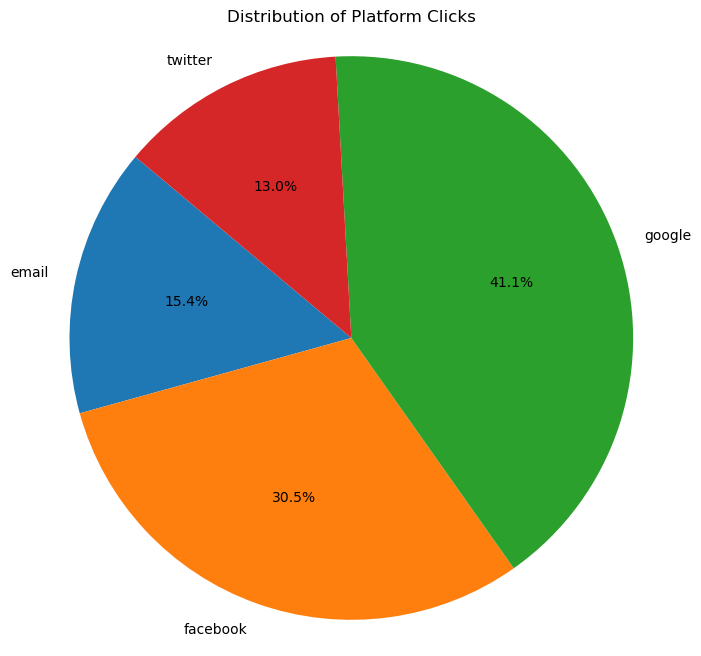

                                user_id utm_source           day  \
0  008b7c6c-7272-471e-b90e-930d548bd8d7     google  6 - Saturday   
1  009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook    7 - Sunday   
2  00f5d532-ed58-4570-b6d2-768df5f41aed    twitter   2 - Tuesday   
3  011adc64-0f44-4fd9-a0bb-f1506d2ad439     google   2 - Tuesday   
4  012137e6-7ae7-4649-af68-205b4702169c   facebook    7 - Sunday   

  ad_click_timestamp experimental_group  is_click  
0               7:18                  A      True  
1                NaN                  B     False  
2                NaN                  A     False  
3                NaN                  B     False  
4                NaN                  B     False  
  utm_source  is_click  user_id
0      email     False      175
1      email      True       80
2   facebook     False      324
3   facebook      True      180
4     google     False      441
is_click utm_source  False  True
0             email    175    80
1          facebook  

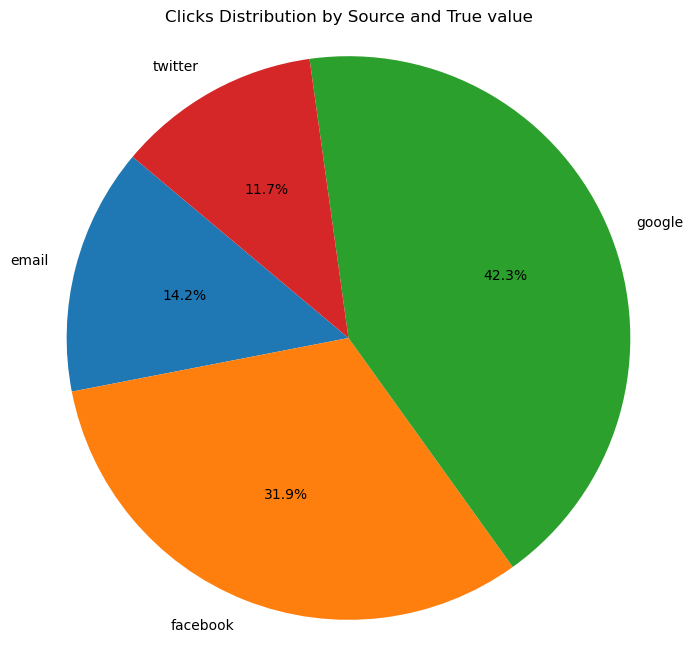

0    0.313725
1    0.357143
2    0.351471
3    0.306977
Name: percent_clicked, dtype: float64
  experimental_group  user_id
0                  A      827
1                  B      827
A greater percentage of users clicked on Ad A.
                                   user_id utm_source            day  \
0     008b7c6c-7272-471e-b90e-930d548bd8d7     google   6 - Saturday   
2     00f5d532-ed58-4570-b6d2-768df5f41aed    twitter    2 - Tuesday   
5     013b0072-7b72-40e7-b698-98b4d0c9967f   facebook     1 - Monday   
6     0153d85b-7660-4c39-92eb-1e1acd023280     google   4 - Thursday   
7     01555297-d6e6-49ae-aeba-1b196fdbb09f     google  3 - Wednesday   
...                                    ...        ...            ...   
1643  fceb13ea-fd8c-446a-a61f-f977d404330a    twitter   6 - Saturday   
1646  fd7d06ea-38b5-4ed9-acc9-777047db8c56     google   4 - Thursday   
1647  fe570a20-448f-40ed-930b-8482b8a7c231   facebook     1 - Monday   
1649  fe8b5236-78f6-4192-9da6-a76bba67cfe6    twi

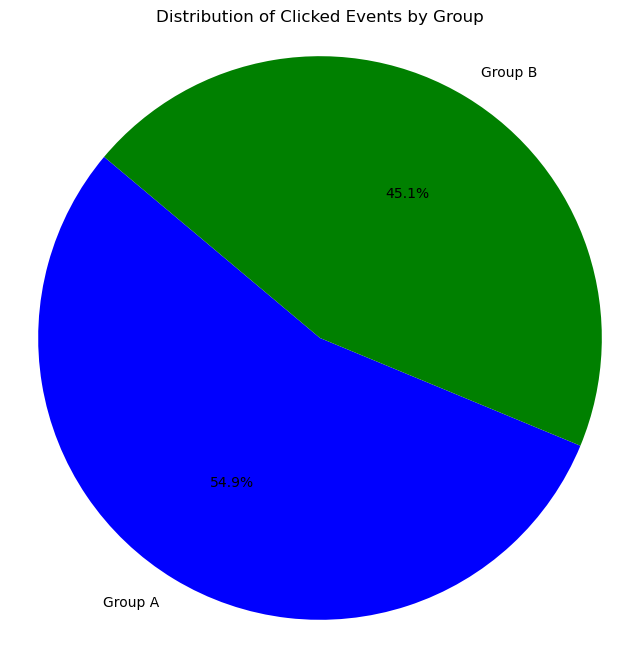

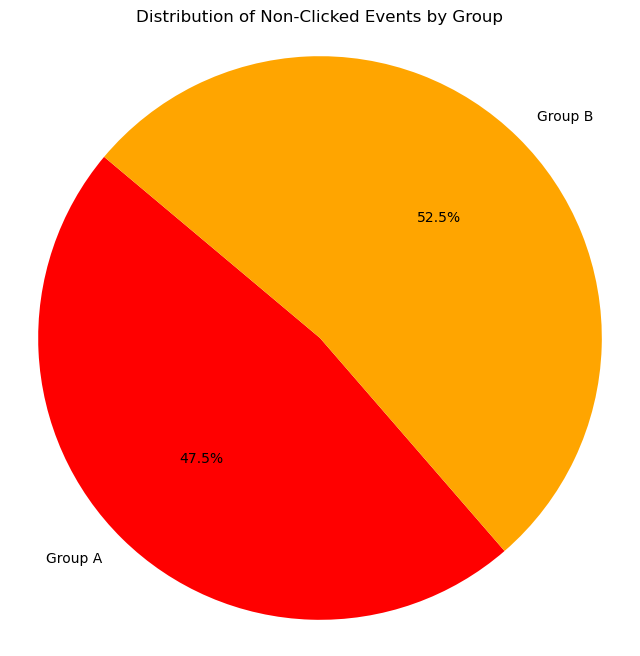

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

ad_clicks = pd.read_csv('ad_clicks.csv')
views_utm = ad_clicks.groupby("utm_source").user_id.count().reset_index()
print(views_utm)
#Examining a few rows of ad_clicks
print(ad_clicks.head())
#Now we want to know which platform is getting the most views
platform_clicks = ad_clicks.groupby('utm_source')\
    .user_id.count()\
    .reset_index()
print (platform_clicks)
# Creating a pie chart to visualize the clicks data for every platform
plt.figure(figsize=(8, 8))
plt.pie(platform_clicks['user_id'], labels=platform_clicks['utm_source'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Platform Clicks')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

#Create a new column called is_click, which is True if ad_click_timestamp is not null and False otherwise.
ad_clicks['is_click'] = ~ad_clicks\
   .ad_click_timestamp.isnull()
#print the table again with the new column. remove the .head() is you want to see all the rows 
print (ad_clicks.head())

#We want to know the percent of people who clicked on ads from each utm_source
clicks_by_source = ad_clicks\
   .groupby(['utm_source',
             'is_click'])\
   .user_id.count()\
   .reset_index()
print(clicks_by_source.head())

#Now let’s pivot the data so that the columns are is_click (either True or False), the index is utm_source, and the values are user_id.
clicks_pivot = clicks_by_source\
   .pivot(index='utm_source',
          columns='is_click',
          values='user_id')\
   .reset_index()
print(clicks_pivot.head())

# Now we do a pie chart for data visualization with the values of True from the variable is_click
plt.figure(figsize=(8, 8))
plt.pie(clicks_pivot[True], labels=clicks_pivot['utm_source'], autopct='%1.1f%%', startangle=140)
plt.title('Clicks Distribution by Source and True value')
plt.axis('equal')
plt.show()
# Calculate the percentage of users who clicked for each source in the clicks_pivot DataFrame
clicks_pivot['percent_clicked'] = \
   clicks_pivot[True] / \
   (clicks_pivot[True] + 
    clicks_pivot[False])
print(clicks_pivot['percent_clicked'])

# Group the data by experimental_group and count the number of users for each group
experimental_groups = ad_clicks.groupby('experimental_group')\
    .user_id.count()\
    .reset_index()
print (experimental_groups)

# Group by both experimental_group and is_click and count user_id
# Group by both experimental_group and is_click and count user_id
clicks_by_experiment = ad_clicks.groupby(['experimental_group', 'is_click']).user_id.count().reset_index()

# Create a pivot table with is_click as columns and experimental_group as index
pivot_clicks_experiment = clicks_by_experiment.pivot(
    columns='is_click',
    index='experimental_group',
    values='user_id'
).reset_index()

# Calculate the percentage of users who clicked for each experimental group
pivot_clicks_experiment['percent_clicked'] = pivot_clicks_experiment[True] / (
    pivot_clicks_experiment[True] + pivot_clicks_experiment[False]
)

# Compare the percentages between Ad A and Ad B (assuming 'A' and 'B' are the experimental group values)
percent_clicked_ad_a = pivot_clicks_experiment[pivot_clicks_experiment['experimental_group'] == 'A']['percent_clicked'].values[0]
percent_clicked_ad_b = pivot_clicks_experiment[pivot_clicks_experiment['experimental_group'] == 'B']['percent_clicked'].values[0]

# Compare the percentages
if percent_clicked_ad_a > percent_clicked_ad_b:
    print("A greater percentage of users clicked on Ad A.")
elif percent_clicked_ad_a < percent_clicked_ad_b:
    print("A greater percentage of users clicked on Ad B.")
else:
    print("The percentages of users who clicked on Ad A and Ad B are the same.")

a_clicks = ad_clicks[
   ad_clicks.experimental_group
   == 'A']
print (a_clicks)

b_clicks = ad_clicks[
   ad_clicks.experimental_group
   == 'B']
print (b_clicks)

# Group by is_click and day for group A
a_clicks = ad_clicks[ad_clicks['experimental_group'] == 'A']
a_clicks_per_day = a_clicks.groupby(['is_click', 'day']).user_id.count().reset_index()

# Pivot the data for group A
a_clicks_pivot = a_clicks_per_day.pivot(
    columns='is_click',
    index='day',
    values='user_id'
).reset_index()

# Calculate the percentage of people who clicked on the ad for group A
a_clicks_pivot['percent_clicked'] = a_clicks_pivot[True] / (
    a_clicks_pivot[True] + a_clicks_pivot[False]
)

# Group by is_click and day for group B
b_clicks = ad_clicks[ad_clicks['experimental_group'] == 'B']
b_clicks_per_day = b_clicks.groupby(['is_click', 'day']).user_id.count().reset_index()

# Pivot the data for group B
b_clicks_pivot = b_clicks_per_day.pivot(
    columns='is_click',
    index='day',
    values='user_id'
).reset_index()

# Calculate the percentage of people who clicked on the ad for group B
b_clicks_pivot['percent_clicked'] = b_clicks_pivot[True] / (
    b_clicks_pivot[True] + b_clicks_pivot[False]
)

# Print the calculated percentages for each group
print("Group A:")
print(a_clicks_pivot)

print("\nGroup B:")
print(b_clicks_pivot)

import matplotlib.pyplot as plt

# Calculate the total number of users who clicked and didn't click for group A
total_clicked_a = a_clicks_pivot[True].sum()
total_not_clicked_a = a_clicks_pivot[False].sum()

# Calculate the total number of users who clicked and didn't click for group B
total_clicked_b = b_clicks_pivot[True].sum()
total_not_clicked_b = b_clicks_pivot[False].sum()

# Data for the pie chart
clicked_data = [total_clicked_a, total_clicked_b]
not_clicked_data = [total_not_clicked_a, total_not_clicked_b]
labels = ['Group A', 'Group B']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(clicked_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'green'])
plt.title('Distribution of Clicked Events by Group')
plt.axis('equal')
plt.show()

# Creating a pie chart for non-clicked events
plt.figure(figsize=(8, 8))
plt.pie(not_clicked_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'orange'])
plt.title('Distribution of Non-Clicked Events by Group')
plt.axis('equal')
plt.show()